In [390]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import datetime

from sklearn.linear_model import LinearRegression, LogisticRegression
from category_encoders import OneHotEncoder
from sklearn.pipeline import make_pipeline



In [391]:
# Load the data from a CSV file
path = '../data/BitCoin.csv'

df = pd.read_csv(path)
print(df.head())
print(df.dtypes)


   Unnamed: 0        Date     Open     High      Low    Close        Volume  \
0           0  2017-09-22  3628.02  3758.27  3553.53  3630.70  1.194830e+09   
1           1  2017-09-21  3901.47  3916.42  3613.63  3631.04  1.411480e+09   
2           2  2017-09-20  3916.36  4031.39  3857.73  3905.95  1.213830e+09   
3           3  2017-09-19  4073.79  4094.07  3868.87  3924.97  1.563980e+09   
4           4  2017-09-18  3591.09  4079.23  3591.09  4065.20  1.943210e+09   

    Market Cap  
0  60152300000  
1  64677600000  
2  64918500000  
3  67520300000  
4  59514100000  
Unnamed: 0      int64
Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume        float64
Market Cap      int64
dtype: object


In [392]:
# print(df.describe())

In [393]:
# df.info()

In [394]:
# Calculate quartiles
def calculate_quartiles(df, column):
    # Calculate the quartiles
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return Q1, Q3, IQR


def prepare_data(path):    
    #conferting one column data type to datetime
    df['Date'] = pd.to_datetime(df['Date'],unit='s')
    df = df.sort_values(by='Timestamp')#sorting acording to timestamp

    columns = ['Open', 'High', 'Low', 'Close', 'Volume_(BTC)', 'Volume_(Currency)', 'Weighted_Price']
    
    #filling missing nan values
    for column in columns:
        df[column] = df[column].interpolate(method='linear', limit_direction='both')
    

#df.isnull().sum()


In [395]:
# Checking for Na values
# df.isnull().any()
# df.isnull().sum()

In [396]:
#  Dropping unnessacery columns 
df.drop( columns='Unnamed: 0', inplace=True)
# df.head()


In [397]:
# df.describe()

In [398]:
# df.info()

In [399]:
# # Log-Transforming the ata
df['log_open'] = np.log(df['Open'])
df['log_high'] = np.log(df['High'])
df['log_low'] = np.log(df['Low'])
df['log_close'] = np.log(df['Close'])
df['log_volume'] = np.log(df['Volume'])

df.head()

,Date,Open,High,Low,Close,Volume,Market Cap,log_open,log_high,log_low,log_close,log_volume
0,2017-09-22,3628.02,3758.27,3553.53,3630.70,1.194830e+09,60152300000,8.196442,8.231714,8.175697,8.197181,20.901270
1,2017-09-21,3901.47,3916.42,3613.63,3631.04,1.411480e+09,64677600000,8.269109,8.272933,8.192468,8.197274,21.067905
2,2017-09-20,3916.36,4031.39,3857.73,3905.95,1.213830e+09,64918500000,8.272918,8.301867,8.257834,8.270256,20.917046
3,2017-09-19,4073.79,4094.07,3868.87,3924.97,1.563980e+09,67520300000,8.312329,8.317295,8.260718,8.275114,21.170500
4,2017-09-18,3591.09,4079.23,3591.09,4065.20,1.943210e+09,59514100000,8.186211,8.313664,8.186211,8.310218,21.387607


In [400]:
# df.info()

In [401]:
# df1 = df.drop(columns='Date')

# corr_matrix = np.zeros((7, 7))
# for i in range(7):
#     for j in range(i+1, 7):
#         corr, _ = pearsonr(df1.iloc[:, i], df.iloc[:, j])
#         corr_matrix[i, j] = corr
#         corr_matrix[j, i] = corr

# print(corr_matrix)

In [402]:
df['Date'] = pd.to_datetime(df['Date'])

# Droped 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap' columns
scaler = StandardScaler()
df2 = df.copy()
df2 = df.drop(columns=['Open', 'High', 'Low', 'Close', 'Volume'])
df2['Date'] = df2['Date'].dt.strftime('%Y-%m-%d') 
df2['Date'] = df2['Date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').timestamp())
df_scaled_droped = scaler.fit_transform(df2)

# # Columns  'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap' not droped
# scaler = StandardScaler()
# df['Date'] = df['Date'].dt.strftime('%Y-%m-%d') 
# df['Date'] = df['Date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d').timestamp())
# # df_scaled_Ndroped = scaler.fit_transform(df)

In [403]:
X_droped = df_scaled_droped[:, :-1]  # features
y_droped = df_scaled_droped[:, -1]  # target variable

X_train_droped, X_test_droped, y_train_droped, y_test_droped = train_test_split(X_droped, y_droped, test_size=0.2, random_state=42)


# X_Ndroped = df_scaled_Ndroped[:, :-1]  # features
# y_Ndroped = df_scaled_Ndroped[:, -1]  # target variable

# X_train_Ndroped, X_test_Ndroped, y_train_Ndroped, y_test_Ndroped = train_test_split(X_Ndroped, y_Ndroped, test_size=0.2, random_state=42)


In [404]:
# ohe = OneHotEncoder(use_cat_names=True)
# encoded_df = ohe.fit_transform(df)
# encoded_df.head()



In [405]:
# df.head()

In [406]:
# target = ['Market Cap' ]
# x = df.drop(columns=target, inplace=False)
# y = df[target]

In [407]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [408]:
# acc_baseline = y_train.value_counts(normalize=True).max()
# acc_baseline

In [409]:
model_droped = LinearRegression()
model_droped.fit(X_train_droped, y_train_droped)
y_pred_droped = model_droped.predict(X_test_droped)


# model_Ndroped = LinearRegression()
# model_Ndroped.fit(X_train_Ndroped, y_train_Ndroped)
# y_pred_Ndroped = model_Ndroped.predict(X_test_Ndroped)

In [410]:
# model = LogisticRegression(max_iter=500)
# model.fit(x_train, y_train)

In [411]:
# lr_train_acc = model.score(x_train, y_train)
# lr_test_acc = model.score(x_test, y_test)

# print("Logistic Regression, Training Accuracy Score:", lr_train_acc)
# print("Logistic Regression, Validation Accuracy Score:", lr_test_acc)

In [412]:
# y_pred = model.predict(x_test)

In [413]:
y_pred_droped = model_droped.predict(X_test_droped)


# y_pred_Ndroped = model_Ndroped.predict(X_test_Ndroped)

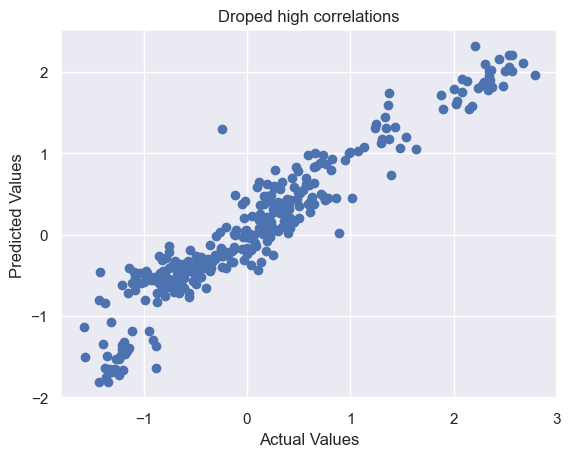

In [414]:
sns.set()
plt.scatter(y_test_droped, y_pred_droped)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Droped high correlations')
plt.show()


# sns.set()
# plt.scatter(y_test, y_pred)
# plt.xlabel('Actual Values')
# plt.ylabel('Predicted Values')
# plt.title('With high correlations')
# plt.show()

In [415]:
df2.head()

,Date,log_open,log_high,log_low,log_close,log_volume
0,1.506031e+09,8.196442,8.231714,8.175697,8.197181,20.901270
1,1.505945e+09,8.269109,8.272933,8.192468,8.197274,21.067905
2,1.505858e+09,8.272918,8.301867,8.257834,8.270256,20.917046
3,1.505772e+09,8.312329,8.317295,8.260718,8.275114,21.170500
4,1.505686e+09,8.186211,8.313664,8.186211,8.310218,21.387607
